# 実践コンピュータビジョン
# 2章 画像の局所記述子
- 複数の画像間で点や領域を対応付けする。
- ２種類の局所記述子を使い、パノラマ画像の作成、拡張現実感、３次元復元などを行う。

## 2.2 SIFT
テキストp.38

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from scipy.ndimage import filters
%matplotlib inline

### SIFT特徴量の描画
SIFT特徴量を計算し、処理するモジュールsift.pyをimportして、特徴量を画像にプロットする。  
SIFT特徴量の計算には、VLFeatというソフトを使い、コンソール上でsiftコマンドを用いてファイルを出力する。
VLFeatのインストールはテキスト参照。

sift.py内の関数は以下。

- process_image(): 画像を処理してSIFTファイルに結果を保存する
- read_features_from_file(): 特徴量を読み込んで行列形式で返す
- write_features_to_file(): 特徴点の配置と記述子をファイルに保存する
- plot_features(): 画像を特徴量とともに描画する
- match(): 第1の画像の各コーナー点記述子について、第2の画像の対応点を選択する
- match_twosided(): 双方向でmatch()を用いて一致を調べる
- appendimages(): 2つの画像を左右に並べた画像を返す
- plot_matches(): ２つの画像の対応点を線で結んで画像を表示する

In [2]:
# SIFT特徴量計算のためのモジュール
import sift

In [4]:
# 対象の画像ファイルのパス
imname = 'data/empire.jpg'
# SIFT特徴量のファイルパス
siftname = 'data/empire.sift'
# 画像の読み込み
im1 = np.array(Image.open(imname).convert('L'))
# SIFT特徴量を計算して、SIFTファイルを出力する
sift.process_image(imname, siftname)
# SIFT特徴量の読み込み
l1, d1 = sift.read_features_from_file(siftname)

processed tmp.pgm to data/empire.sift


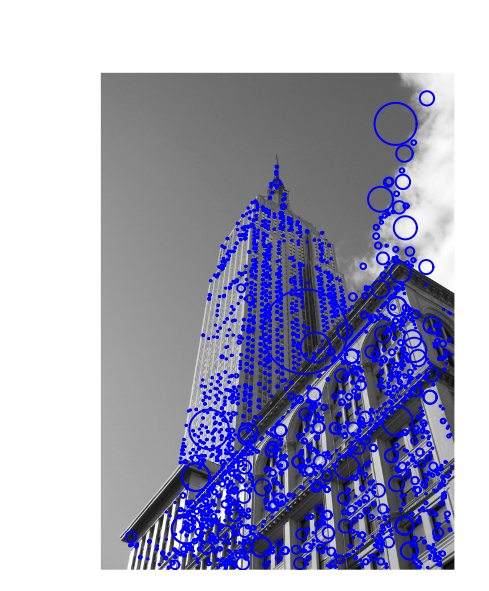

In [5]:
# SIFT特徴点の描画
plt.figure(figsize=(10,10))
plt.gray()
sift.plot_features(im1, l1, circle=True)
plt.show()

In [6]:
# SIFT特徴量を用いた画像の比較
# 例1
imname1 = 'data/crans_1_small.jpg'
imname2 = 'data/crans_2_small.jpg'

im1 = np.array(Image.open(imname1).convert('L')) 
im2 = np.array(Image.open(imname2).convert('L')) 

sift.process_image(imname1,imname1 + '.sift')
l1,d1 = sift.read_features_from_file(imname1 + '.sift')

sift.process_image(imname2,imname2 + '.sift')
l2,d2 = sift.read_features_from_file(imname2 + '.sift')

# 双方向で一致を検出する
matches = sift.match_twosided(d1,d2)

processed tmp.pgm to data/crans_1_small.jpg.sift
processed tmp.pgm to data/crans_2_small.jpg.sift


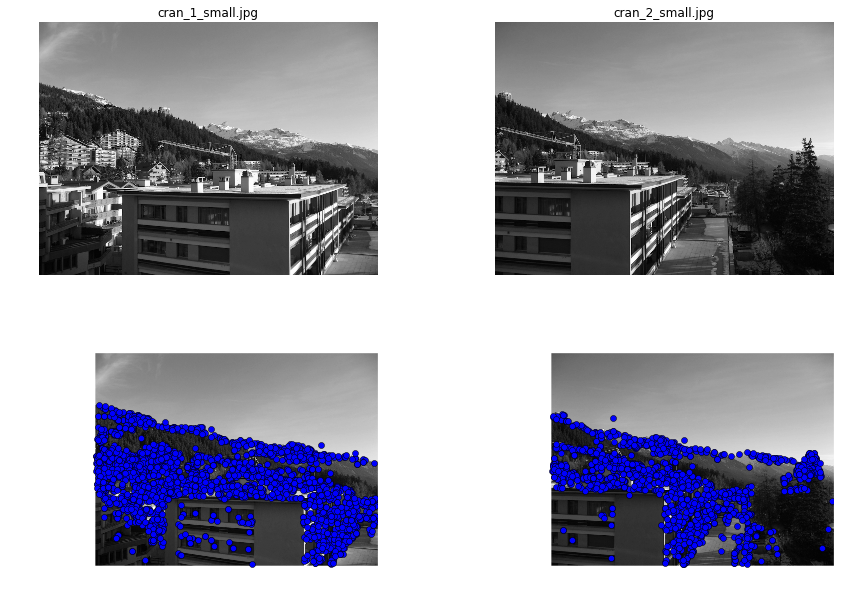

In [7]:
# 2枚の画像を表示し、SIFT特徴点をプロットする
plt.figure(figsize=(15,10))
plt.gray()
imlist = [im1, im2]
tlist = ['cran_1_small.jpg', 'cran_2_small.jpg']
loclist = [l1, l2]

for i, im, t in zip(range(2), imlist, tlist):
    plt.subplot(2,2,i+1)
    plt.imshow(im)
    plt.title(t)
    plt.axis('off')
    
for i, im, t, loc in zip(range(2), imlist, tlist, loclist):
    plt.subplot(2,2,i+3)
    sift.plot_features(im, loc)
plt.show()

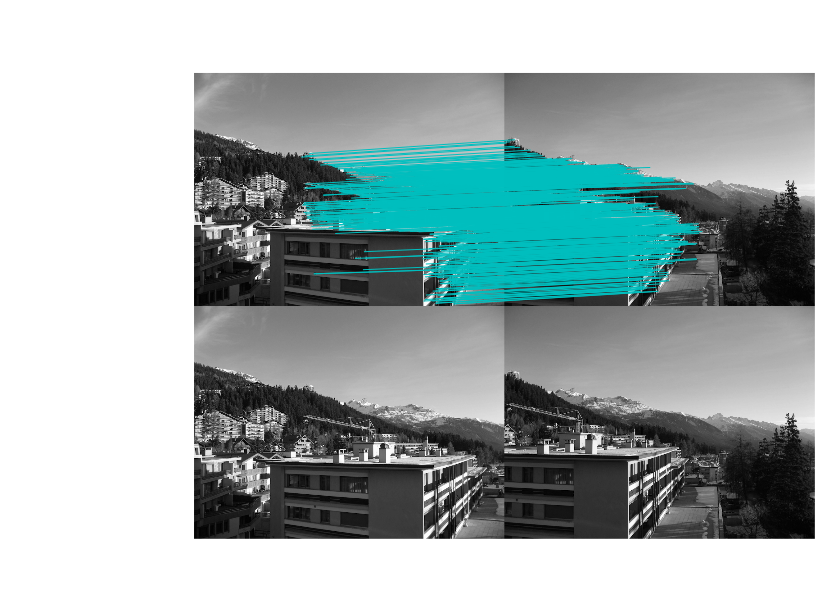

In [8]:
# 対応点を結ぶ
plt.figure(figsize=(15,10))
plt.gray()
sift.plot_matches(im1,im2,l1,l2,matches)
plt.show()

### 例1の結果
Harrisコーナー記述子の例に比べると、一致線が平行で長さも揃っている。  
Harrisコーナー検出よりSIFTは、よりロバストな特徴抽出ができているとみられる。

processed tmp.pgm to data/sf_view1.jpg.sift
processed tmp.pgm to data/sf_view2.jpg.sift


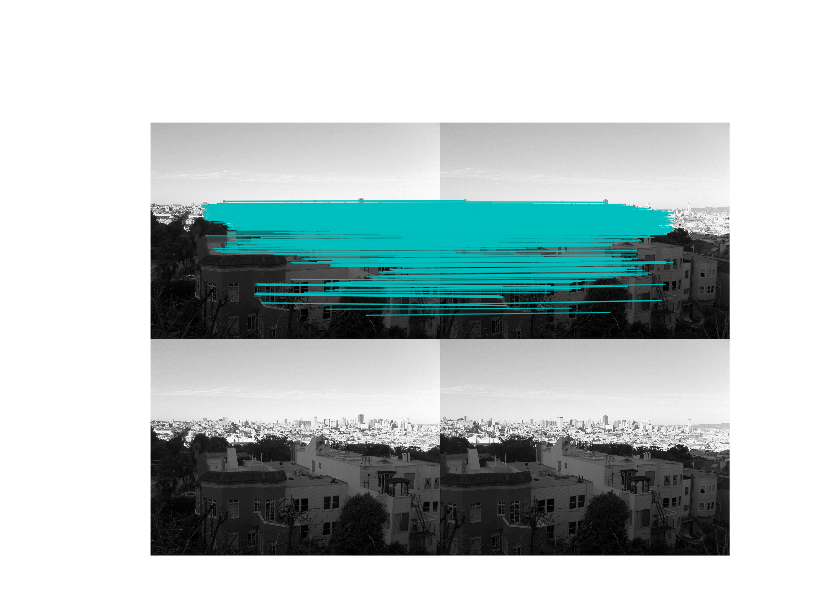

In [9]:
# 例2: 
imname1 = 'data/sf_view1.jpg'
imname2 = 'data/sf_view2.jpg'

im1 = np.array(Image.open(imname1).convert('L')) 
im2 = np.array(Image.open(imname2).convert('L')) 

sift.process_image(imname1,imname1 + '.sift')
l1,d1 = sift.read_features_from_file(imname1 + '.sift')

sift.process_image(imname2,imname2 + '.sift')
l2,d2 = sift.read_features_from_file(imname2 + '.sift')

matches = sift.match_twosided(d1,d2)

# 対応点をむすぶ
plt.figure(figsize=(15,10))
plt.gray()
sift.plot_matches(im1,im2,l1,l2,matches)
plt.show()

### 例2の結果
例1と同じく一致線が平行で揃っている。

processed tmp.pgm to data/climbing_1_small.jpg.sift
processed tmp.pgm to data/climbing_2_small.jpg.sift


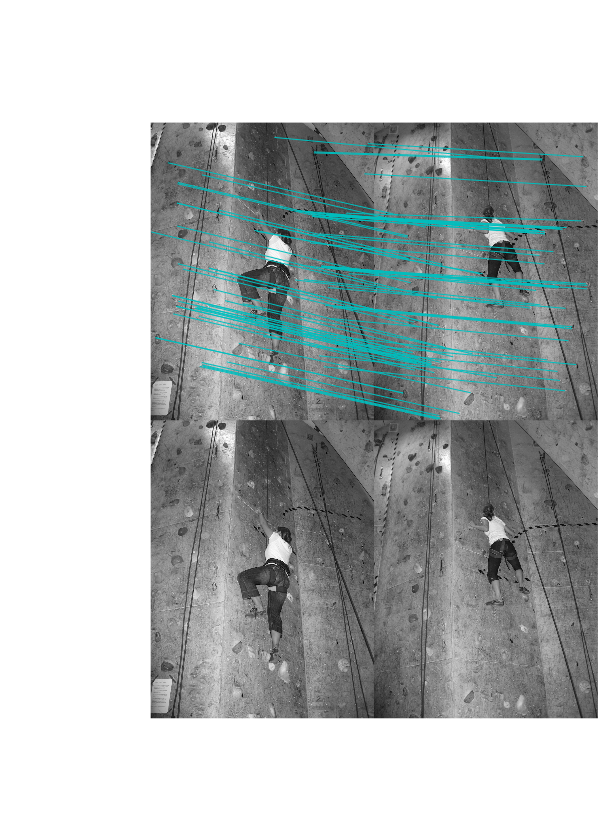

In [10]:
# 例3: クライミングの写真
imname1 = 'data/climbing_1_small.jpg'
imname2 = 'data/climbing_2_small.jpg'

im1 = np.array(Image.open(imname1).convert('L')) 
im2 = np.array(Image.open(imname2).convert('L')) 

sift.process_image(imname1,imname1 + '.sift')
l1,d1 = sift.read_features_from_file(imname1 + '.sift')

sift.process_image(imname2,imname2 + '.sift')
l2,d2 = sift.read_features_from_file(imname2 + '.sift')

matches = sift.match_twosided(d1,d2)

# 対応点をむすぶ
plt.figure(figsize=(10,15))
plt.gray()
sift.plot_matches(im1,im2,l1,l2,matches)
plt.show()

### 例3の結果
複数の面からなる壁を、異なる角度から撮影しているため、面によって一致線の出方が変わる。  
２つの画像を比べると、特徴的な点は一致しており、正しい比較ができていることがわかる。

processed tmp.pgm to data/tanuki_1.jpg.sift
processed tmp.pgm to data/tanuki_2.jpg.sift


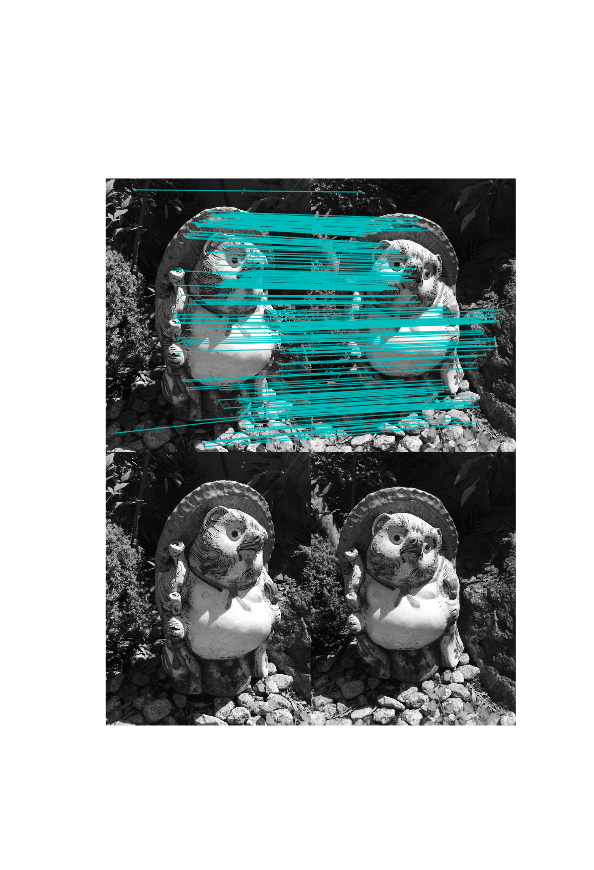

In [13]:
# 例4: タヌキの写真
imname1 = 'data/tanuki_1.jpg'
imname2 = 'data/tanuki_2.jpg'

im1 = np.array(Image.open(imname1).convert('L')) 
im2 = np.array(Image.open(imname2).convert('L')) 

sift.process_image(imname1,imname1 + '.sift')
l1,d1 = sift.read_features_from_file(imname1 + '.sift')

sift.process_image(imname2,imname2 + '.sift')
l2,d2 = sift.read_features_from_file(imname2 + '.sift')

matches = sift.match_twosided(d1,d2)

# 対応点をむすぶ
plt.figure(figsize=(15, 15))
plt.gray()
sift.plot_matches(im1,im2,l1,l2,matches)
plt.show()

### 例4の結果
Harrisコーナーでは、対応線がバラバラだったが、SIFT特徴量では線がそろった。  
像が回転しても、特徴点を正確にとらえていることがわかる。